In [7]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

In [10]:
df = pd.read_csv(file_path, header=0)

In [11]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
# Analyzing Individual Feature Patterns Using Visualization

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [13]:
# list the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [ ]:
#Question #1:
#What is the data type of the column "peak-rpm"? - float64

In [14]:
df['peak-rpm'].dtypes

dtype('float64')

In [16]:
#calculate the correlation between variables of type "int64" or "float64" using the method "corr":
df.corr

<bound method DataFrame.corr of      symboling  normalized-losses         make aspiration num-of-doors  \
0            3                122  alfa-romero        std          two   
1            3                122  alfa-romero        std          two   
2            1                122  alfa-romero        std          two   
3            2                164         audi        std         four   
4            2                164         audi        std         four   
..         ...                ...          ...        ...          ...   
196         -1                 95        volvo        std         four   
197         -1                 95        volvo      turbo         four   
198         -1                 95        volvo        std         four   
199         -1                 95        volvo      turbo         four   
200         -1                 95        volvo      turbo         four   

      body-style drive-wheels engine-location  wheel-base    length  ...  \
0  

In [ ]:
#Question #2: 
#Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.

In [17]:
df[['bore','stroke','compression-ratio','horsepower']].corr

<bound method DataFrame.corr of      bore  stroke  compression-ratio  horsepower
0    3.47    2.68                9.0       111.0
1    3.47    2.68                9.0       111.0
2    2.68    3.47                9.0       154.0
3    3.19    3.40               10.0       102.0
4    3.19    3.40                8.0       115.0
..    ...     ...                ...         ...
196  3.78    3.15                9.5       114.0
197  3.78    3.15                8.7       160.0
198  3.58    2.87                8.8       134.0
199  3.01    3.40               23.0       106.0
200  3.78    3.15                9.5       114.0

[201 rows x 4 columns]>

In [ ]:
#Continuous Numerical Variables:

In [ ]:
#Positive Linear Relationship

(0.0, 52930.29276483088)

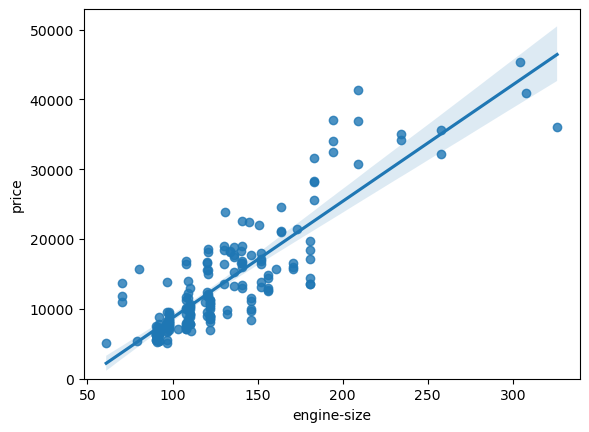

In [18]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size",y="price",data=df)
plt.ylim(0,)

In [20]:
#examine the correlation between 'engine-size' and 'price'
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


In [ ]:
#As the engine-size goes up, the price goes up: 
#this indicates a positive direct correlation between these two variables. 
#Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

In [ ]:
# Let's find the scatterplot of "highway-mpg" and "price".

(0.0, 48181.89091439264)

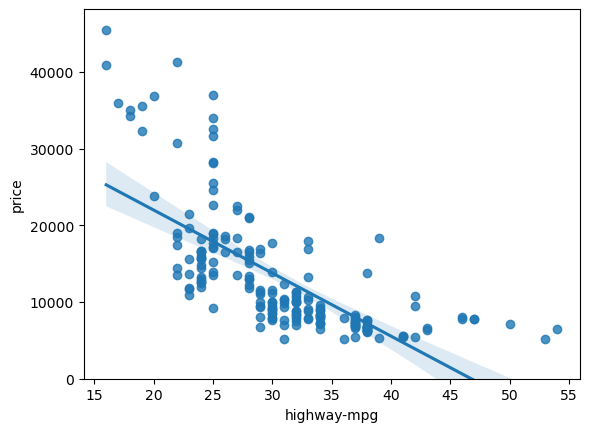

In [21]:
# Highway mpg as potential predictor variable of price
sns.regplot(x="highway-mpg",y="price",data=df)
plt.ylim(0,)

In [ ]:
#As highway-mpg goes up, the price goes down: 
#this indicates an inverse/negative relationship between these two variables. \
#Highway mpg could potentially be a predictor of price.

In [22]:
df[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


In [ ]:
# Correlation coefficient
# close to +1: Large positive relationship
# close to -1: Large negative relationship
#  close to 0: No relationship

# P-value
#  P-value < 0.001  Strong certainty in the result
#  P-value < 0.05   Moderate certainty in the result
#  P-value < 0.1    Weak certainty in the result
#  P-value > 0.1    No certainty in the result

In [ ]:
#Weak Linear Relationship

<Axes: xlabel='peak-rpm', ylabel='price'>

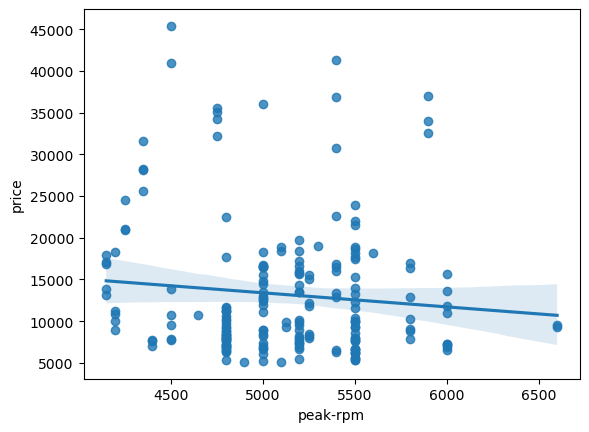

In [23]:
sns.regplot(x="peak-rpm",y="price",data=df)

In [ ]:
#Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. 
#Also, the data points are very scattered and far from the fitted line, showing lots of variability. 
#Therefore, it's not a reliable variable.

In [24]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [ ]:
#Question 3A
#Find the correlation between x="stroke" and y="price"

In [25]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


In [26]:
#Question 3B
#Given the correlation results between "price" and "stroke", do you expect a linear relationship?
#Verify your results using the function "regplot()".

<Axes: xlabel='stroke', ylabel='price'>

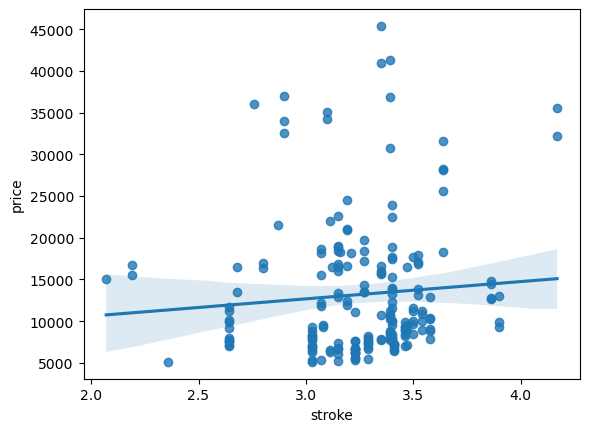

In [28]:
sns.regplot(x="stroke",y="price",data=df)

In [ ]:
#There is a weak correlation between the variable 'stroke' and 'price.' as such regression will not work well. \
#We can see this using "regplot" to demonstrate this.

In [ ]:
#Categorical Variables

<Axes: xlabel='body-style', ylabel='price'>

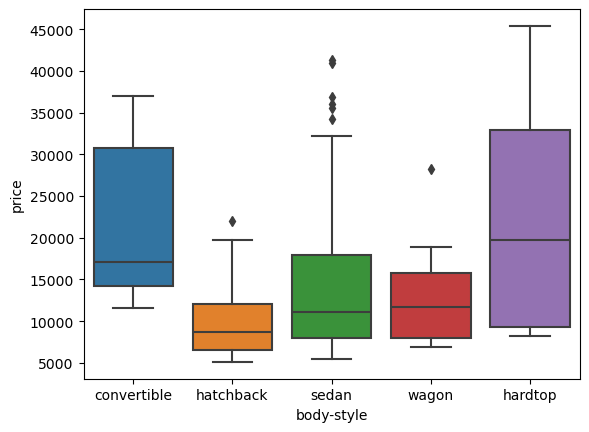

In [29]:
#the relationship between "body-style" and "price".
sns.boxplot(x='body-style',y='price',data=df)

In [ ]:
#We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price. 
#Let's examine engine "engine-location" and "price"

<Axes: xlabel='engine-location', ylabel='price'>

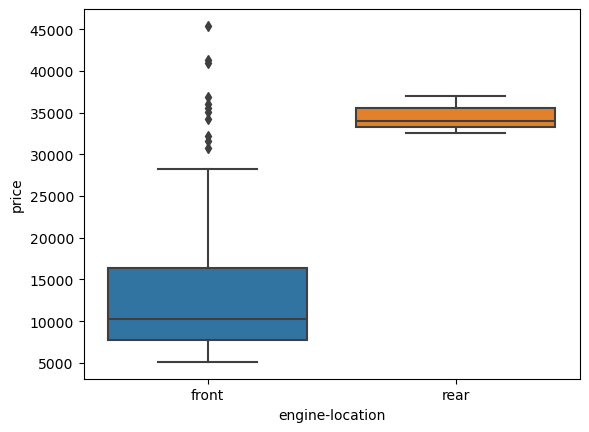

In [30]:
#the relationship between "engine-location" and "price".
sns.boxplot(x='engine-location',y='price',data=df)

In [ ]:
#Here we see that the distribution of price between these two engine-location categories, 
#front and rear, are distinct enough to take engine-location as a potential good predictor of price.

<Axes: xlabel='drive-wheels', ylabel='price'>

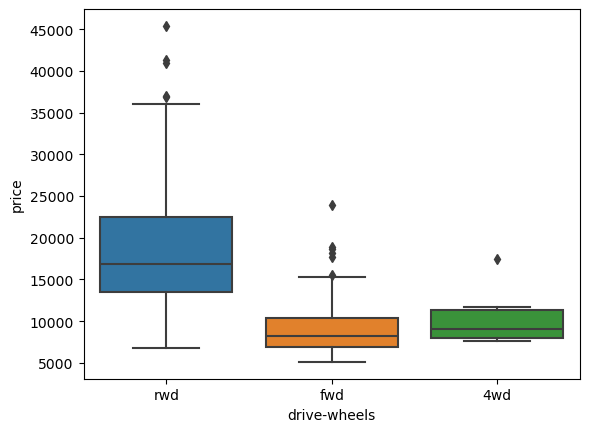

In [32]:
sns.boxplot(x='drive-wheels',y='price',data=df)

In [ ]:
#Here we see that the distribution of price between the different drive-wheels categories differs. 
#As such, drive-wheels could potentially be a predictor of pric

In [34]:
#Descriptive Statistical Analysis - df.describe()
#the count of that variable
#the mean
#the standard deviation (std)
#the minimum value
#the IQR (Interquartile Range: 25%, 50% and 75%)
#the maximum value

In [38]:
df.describe()
#Any NaN values are automatically skipped in these statistics.

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [42]:
#Value Counts
#Value counts is a good way of understanding how many units of each characteristic/variable we have

In [44]:
df['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

In [45]:
# convert the series to a dataframe

In [46]:
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [47]:
#rename the column 'drive-wheels' to 'value_counts'.

In [53]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [54]:
#rename the index to 'drive-wheels':

In [55]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [ ]:
#repeat the above process for the variable 'engine-location'.

In [ ]:
# engine-location as variable

In [56]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


In [ ]:
#After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. 
#This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. 
#Thus, we are not able to draw any conclusions about the engine location.

In [ ]:
#Basics of Grouping: The "groupby" method groups data by different categories. 
#The data is grouped based on one or several variables, and analysis is performed on the individual groups.

In [57]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [58]:
df_group_one = df[['drive-wheels','body-style','price']]

In [60]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [61]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [63]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [64]:
#Question 4
#Use the "groupby" function to find the average "price" of each car based on "body-style".

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [66]:
#Variables: Drive Wheels and Body Style vs. Price

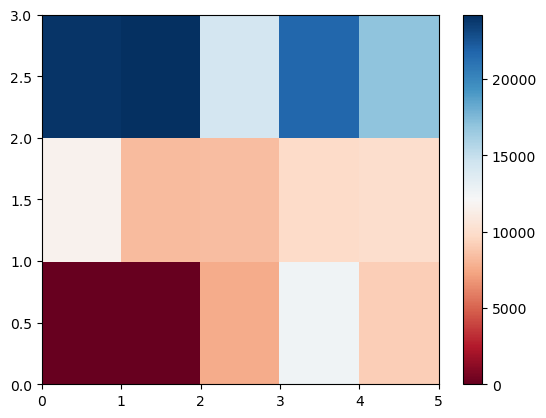

In [67]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

In [ ]:
#The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' on the vertical and horizontal axis, respectively. 
#This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.

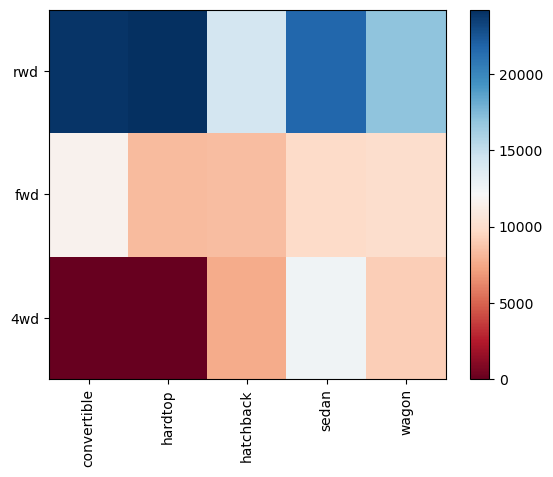

In [68]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [70]:
#The main question we want to answer in this module is, "What are the main characteristics which have the most impact on the car price?".
#To get a better measure of the important characteristics, we look at the correlation of these variables with the car price. 
#In other words: how is the car price dependent on this variable?

In [71]:
#Correlation and Causation
#Correlation: a measure of the extent of interdependence between variables.
#Causation: the relationship between cause and effect between two variables.

In [73]:
#Pearson Correlation -- df.corr()
#1: Perfect positive linear correlation.
#0: No linear correlation, the two variables most likely do not affect each other.
#-1: Perfect negative linear correlation.

In [ ]:
#P-value
#p-value is 
# 0.001: we say there is strong evidence that the correlation is significant.
#the p-value is 
# 0.05: there is moderate evidence that the correlation is significant.
#the p-value is 
# 0.1: there is weak evidence that the correlation is significant.
#the p-value is 
# 0.1: there is no evidence that the correlation is significant.

In [75]:
from scipy import stats

In [76]:
#Wheel-Base vs. Price

In [77]:
#calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.

In [79]:
pearson_coef,p_value = stats.pearsonr(df['wheel-base'],df['price'])
print("The Pearson Correlation Coefficient is ",pearson_coef," with a P-value of P =", p_value)

The Pearson Correlation Coefficient is  0.584641822265508  with a P-value of P = 8.076488270732885e-20


In [80]:
#Since the p-value is 
# 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).

In [ ]:
#Horsepower vs. Price

In [81]:
pearson_coef,p_value = stats.pearsonr(df['horsepower'],df['price'])
print("The Pearson Correlation Coefficient is ",pearson_coef," with a P-value of P =", p_value)

The Pearson Correlation Coefficient is  0.809574567003656  with a P-value of P = 6.369057428259557e-48


In [ ]:
#Since the p-value is 
# 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).

In [82]:
#Length vs. Price
pearson_coef,p_value = stats.pearsonr(df['length'],df['price'])
print("The Pearson Correlation Coefficient is ",pearson_coef," with a P-value of P =", p_value)

The Pearson Correlation Coefficient is  0.690628380448364  with a P-value of P = 8.016477466158868e-30


In [ ]:
#Since the p-value is 
# 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

In [83]:
#Width vs. Price
pearson_coef,p_value = stats.pearsonr(df['width'],df['price'])
print("The Pearson Correlation Coefficient is ",pearson_coef," with a P-value of P =", p_value)

The Pearson Correlation Coefficient is  0.7512653440522674  with a P-value of P = 9.20033551048144e-38


In [ ]:
#Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

In [85]:
#Curb-Weight vs. Price
pearson_coef,p_value = stats.pearsonr(df['curb-weight'],df['price'])
print("The Pearson Correlation Coefficient is ",pearson_coef," with a P-value of P =", p_value)

The Pearson Correlation Coefficient is  0.8344145257702845  with a P-value of P = 2.189577238893965e-53


In [ ]:
#Since the p-value is 
# 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).

In [86]:
#Engine-Size vs. Price
pearson_coef,p_value = stats.pearsonr(df['engine-size'],df['price'])
print("The Pearson Correlation Coefficient is ",pearson_coef," with a P-value of P =", p_value)

The Pearson Correlation Coefficient is  0.8723351674455186  with a P-value of P = 9.265491622197359e-64


In [ ]:
#Since the p-value is 
#0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

In [87]:
#Bore vs. Price
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935315e-17


In [ ]:
#Since the p-value is 
# 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).

In [ ]:
#Conclusion
#Continuous numerical variables:
#Length
#Width
#Curb-weight
#Engine-size
#Horsepower
#City-mpg
#Highway-mpg
#Wheel-base
#Bore

#Categorical variables:
#Drive-wheels